In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('gpt_results/output.csv')

In [28]:
df_1 = df[df['mode_size']=='gpt2'].sort_values(by='batch_size')
df_2 = df[df['mode_size']=='gpt2-medium'].sort_values(by='batch_size')
df_3 = df[df['mode_size']=='gpt2-large'].sort_values(by='batch_size')
df_4 = df[df['mode_size']=='gpt2-xl'].sort_values(by='batch_size')

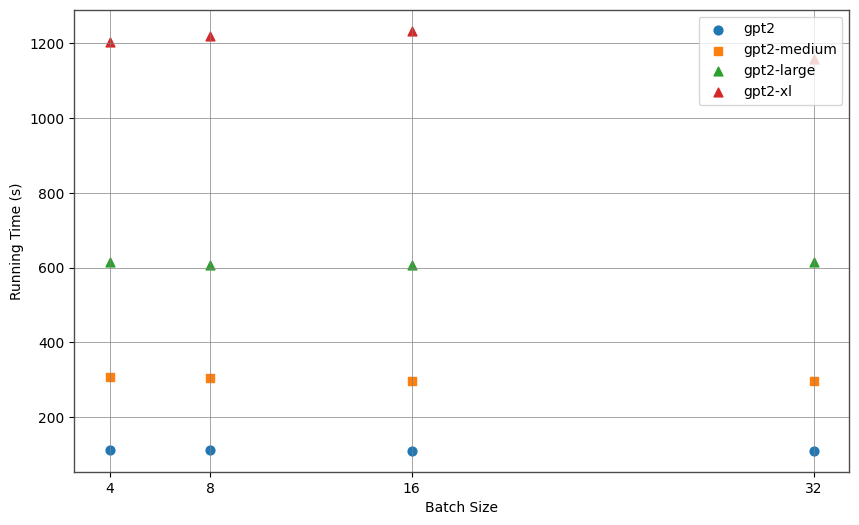

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

x = df_1['batch_size'] // 4

ax.scatter(x, df_1['running_time'], color='#1f77b4', marker='o', s=40, label='gpt2')
ax.scatter(x, df_2['running_time'], color='#ff7f0e', marker='s', s=40, label='gpt2-medium')
ax.scatter(x, df_3['running_time'], color='#2ca02c', marker='^', s=40, label='gpt2-large')
ax.scatter(x, df_4['running_time'], color='#d62728', marker='^', s=40, label='gpt2-xl')

ax.set_xlabel("Batch Size")
ax.set_ylabel('Running Time (s)')

ax.set_xticks([1, 2, 4, 8])  
ax.set_xticklabels(['4','8', '16', '32'])  
ax.grid(True, color='gray', linewidth=0.5)
ax.legend()

for spine in ax.spines.values():
    spine.set_edgecolor('#4D4D4D')  
    spine.set_linewidth(1)  

plt.savefig(f"gpt_results/running_time_b_m.png")


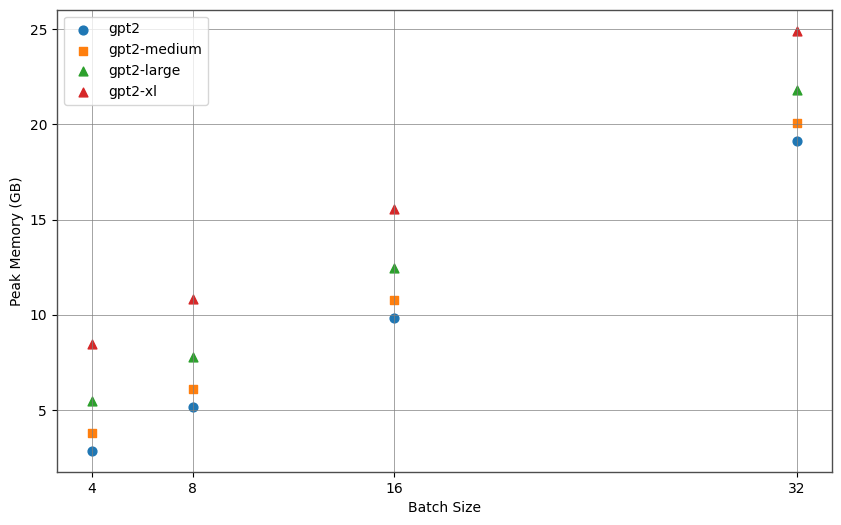

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

x = df_1['batch_size'] // 4

ax.scatter(x, df_1['peak_memory']/1024, color='#1f77b4', marker='o', s=40, label='gpt2')
ax.scatter(x, df_2['peak_memory']/1024, color='#ff7f0e', marker='s', s=40, label='gpt2-medium')
ax.scatter(x, df_3['peak_memory']/1024, color='#2ca02c', marker='^', s=40, label='gpt2-large')
ax.scatter(x, df_4['peak_memory']/1024, color='#d62728', marker='^', s=40, label='gpt2-xl')

ax.set_xlabel("Batch Size")
ax.set_ylabel('Peak Memory (GB)')

ax.set_xticks([1, 2, 4, 8])  
ax.set_xticklabels(['4','8', '16', '32'])  
ax.grid(True, color='gray', linewidth=0.5)
ax.legend()

for spine in ax.spines.values():
    spine.set_edgecolor('#4D4D4D')  
    spine.set_linewidth(1)  

plt.savefig(f"gpt_results/peak_memory_b_m.png")
